### Introduction Maths pour la Data Science


Ce notebook est un support de cours avec un TP intégré.

Je commencerai par charger une jeu de données. Nous l'utiliserons pour illustrer des concepts de stats/maths appliquées de base.

Nous utiliserons dans ce notebook la librairie, numpy, qui est celle de reference concernant le calcul scientifique (manipulation/operation vecteur matrice, outils statistiques ...) ainsi que pandas pour manipuler nos données.

Et nous verrons également deux librairies de visualisation matplotlib et seaborn



In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

### Analyse de la taille 

Le terme régression a été introduit par Sir Francis Galton (cousin de C. Darwin) au xixe siècle, alors qu'il étudiait la taille des individus au sein d'une descendance. Il tentait de comprendre pourquoi les grands individus d'une population semblaient avoir des enfants d'une taille plus petite, plus proche de la taille moyenne de la population; d'où l'introduction du terme "régression" (approcher une variable à partir d’autres qui lui sont corrélées).

*Le terme provient de la régression vers la moyenne observée par Sir Francis Galton : les enfants de personnes de grande taille avaient eux-mêmes une taille supérieure à celle de la population en moyenne, mais inférieure à celle de leurs parents (toujours en moyenne), sans que la dispersion de taille au sein de la population totale ne soit réduite pour autant*


Dans la suite on va s’intéresser aux données récoltées par Galton.

#### Lire dataset sous un format de type DataFrame (galton_dataset.csv)

Afficher les 5 premieres lgnes

In [5]:
df=pd.read_csv("galton_dataset.csv",sep='\t')
df

Family  Father  Mother Gender  Height  Kids
0        1    78.5    67.0      M    73.2     4
1        1    78.5    67.0      F    69.2     4
2        1    78.5    67.0      F    69.0     4
3        1    78.5    67.0      F    69.0     4
4        2    75.5    66.5      M    73.5     4
..     ...     ...     ...    ...     ...   ...
893   136A    68.5    65.0      M    68.5     8
894   136A    68.5    65.0      M    67.7     8
895   136A    68.5    65.0      F    64.0     8
896   136A    68.5    65.0      F    63.5     8
897   136A    68.5    65.0      F    63.0     8

[898 rows x 6 columns]

#### Convertissez les colonnes ['Father', 'Mother', 'Height'] (inch) en cm et renommez la colonne "Height" par "Hkids"

In [6]:
col=['Father','Mother','Height']
for colonne in col:
    df[colonne]=df[colonne]*2.54
df.head()

Family  Father  Mother Gender   Height  Kids
0      1  199.39  170.18      M  185.928     4
1      1  199.39  170.18      F  175.768     4
2      1  199.39  170.18      F  175.260     4
3      1  199.39  170.18      F  175.260     4
4      2  191.77  168.91      M  186.690     4

#### Filtrer votre dataframe pour ne conserver que les garçons

In [10]:
df[df['Gender']=="M"]

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
4        2  191.77  168.91      M  186.690     4
5        2  191.77  168.91      M  184.150     4
8        3  190.50  162.56      M  180.340     2
10       4  190.50  162.56      M  179.070     5
..     ...     ...     ...    ...      ...   ...
890   136A  173.99  165.10      M  182.880     8
891   136A  173.99  165.10      M  179.070     8
892   136A  173.99  165.10      M  174.498     8
893   136A  173.99  165.10      M  173.990     8
894   136A  173.99  165.10      M  171.958     8

[465 rows x 6 columns]

#### Combien de données manquantes y-t-il dans cette base de données ? Enlever si besoin les lignes ayant des données manquantes.

In [9]:
df.isna().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

#### Analysons la taille des mères et des pères 

Créer un DataFrame "peres" en partant du df initial et en ne conservant que les lignes où il n y a pas de lignes dupliquées sur les champs (Family,Father).

In [23]:
peres=df.groupby('Family')['Father'].mean()
peres

Family
1      199.39
10     187.96
100    175.26
101    175.26
102    175.26
        ...  
95     177.80
96     177.80
97     175.26
98     175.26
99     175.26
Name: Father, Length: 197, dtype: float64

Créer un DataFrame "meres" de la meme façon.

In [30]:
meres=df.drop_duplicates(["Family"])["Mother"]
meres

0      170.18
4      168.91
8      162.56
10     162.56
15     148.59
        ...  
882    160.02
883    152.40
885    167.64
888    160.02
890    165.10
Name: Mother, Length: 197, dtype: float64

### Rappel statistiques

<img src="img/moyenne.png" width="800">

<img src="img/mediane.png" width="800">

Creer une fonction (med) qui calcule la mediane (d'une serie ou liste, ...) en reprenant la defnition ci dessus

In [26]:
def med(l):
    n=len(l)
    # Classer la liste 
    l.sort()
    if len(l)%2 ==0:
        print(n,int(n/2)-1,int(n/2)+1)
        # Enlever une unité à l'index de la liste (car list[0]=1er element )
        m=(l[int(n/2)-1]+l[int(n/2)+1-1])/2
    else:
        # Enlever une unité à l'index de la liste (car list[0]=1er element )
        m=l[int((n+1)/2)-1]
    return m
    
    
med(list(peres)),peres.median()

(176.53, 176.53)

Trouver la taille moyenne de ces series de données (en utilisant pandas et numpy)

In [28]:
np.mean(peres)

176.14706598984768

In [31]:
print('#######################  Moyenne peres et meres ##########################')
print("Peres avec Pandas : ", peres.mean(), " // Peres avec numpy : ",np.mean(peres))
print("Meres avec Pandas : ", meres.mean(), " // Peres avec numpy : ",np.mean(meres))

#######################  Moyenne peres et meres ##########################
Peres avec Pandas :  176.14706598984768  // Peres avec numpy :  176.14706598984768
Meres avec Pandas :  162.5200304568528  // Peres avec numpy :  162.5200304568528


Trouver la taille mediane de ces series de données (avec pandas et numpy)

In [32]:
print('#######################  Mediane peres et meres  ##########################')
print("Peres avec Pandas : ", peres.median(), " // Peres avec numpy : ",np.median(peres))
print("Meres avec Pandas : ", meres.median(), " // Peres avec numpy : ",np.median(meres))


#######################  Mediane peres et meres  ##########################
Peres avec Pandas :  176.53  // Peres avec numpy :  176.53
Meres avec Pandas :  162.56  // Peres avec numpy :  162.56


<img src="img/Moyenne vs mediane.png" width="800">

Calculer les ecarts types de chacune de ces series (np.std) où np =alias(numpy)

In [44]:
peres.std(ddof=0),meres.std(ddof=0)

(6.643041819065913, 5.968036259185308)

In [39]:
np.std(peres),np.std(meres)

(6.643041819065913, 5.968036259185308)

<img src="img/Dispersion_variance_ecart_type.png" width="800">

#### Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère.

utilisez pour cela, kdeplot un estimateur de densité de la librairie seaborn

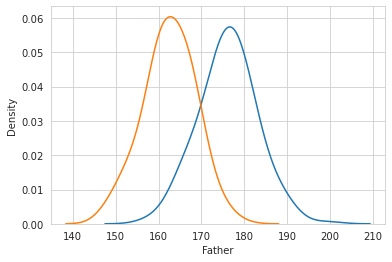

In [52]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(peres, bw=0.5)
sns.kdeplot(meres, bw=0.5)
plt.show();

#### En reprenant le resultat des indicateurs precedemment calculés, expliquez  :
- Sommets des "clochees" (la postion (l'abscisse))
- L'"écartement" des cloches 

#### La dataviz nous permet également de qualifier un "taux de dispersion" 

La boite à moustache / box plot, permet de representer la distribution de la serie en enlevant les observations 
extremes (les plus faibles ou plus elevees), en moyene 1% des données.

Ci dessous cette representation en reprenant nos celle des peres

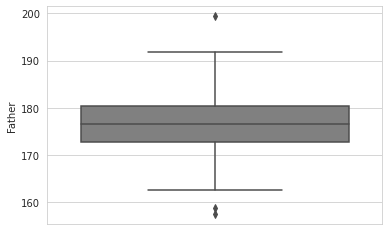

In [54]:
sns.set_style('whitegrid')
sns.boxplot( y = peres,color=".5")
plt.show()

- La mediane est representée au centre de la box
- Le quartile inferieure est "inferieur" à 173 cm
- Le quartile superieur est "superieur" à 179 cm
- Dans cette boite il y a 50% des observations, elle "mesure" environ 6 cm
- Deux traits parralleles limitent cette figure (189 cm et 165 cm)

==> ils marquent les limites des observations utilisées pour le calcul des metrics (mediane et quartile sont calculés sur cet echantillon de points). Au delà il s'agit d'éléments considérés comme "outliers"
(On utilise 1.5*6=9 cm de limite haute et basse en partant des extremas de la box)

Tracer la meme representation mais pour la taille des meres

In [53]:
sns.set_style('whitegrid')
sns.boxplot( y = meres,color=".5")
plt.show()

Avec l'aide de la methode .hist() associé aux objets de type Series, tracez la distribution en coupant l'axe des abscisses en 10 intervalles de meme "largeur"

In [58]:
meres.hist(bins=10,alpha=0.5);

Utilisez le parametre "bins" de la methode .hist() pour tracez la distribution en coupant l'axe des abscisses en 4 intervalles de meme "longueur"

In [63]:
meres.hist(bins=4,alpha=0.5);

#### Remarque: densité de la série

La densité visualisée plus haut (*Afficher sur un même graphe un estimateur de la densité de la population des pères et de celles des mère"*) correspond à un tracé (continu) interpolé des données (discretes). 

Utilisez la visualisation seaborn .distplot() pour observer ces deux tracés.

In [61]:
sns.distplot(peres);

#### Maintenant nous allons tracer une droite (créer un estimateur) interpolant la taille des enfants en fonction des variables explicatives (taille du pere et de la mere)

Pour comprendre sur ce jeu de données les correlations (dépendances ?) entre les colonnes (features), nous allons creer une matrice de correlation.

La corelation entre deux vecteurs/series permet d'identifier une "dependance" entre eux. Cette valeur, généralement [0,1] vaut 1 pour une "dependance" (similarité) et 0 pour une "independance" (non similarité). Cependant, les resultats sont le plus souvent des nombres decimaux situés dans cette intervalle.


#### Pearson correlation coefficient

Forme générale : 
<img src="img/f76ccfa7c2ed7f5b085115086107bbe25d329cec.svg" width="200">

Forme discrete :
<img src="img/2b9c2079a3ffc1aacd36201ea0a3fb2460dc226f.svg" width="250">



Elle nous donne une information sur le rapprochement de deux features (les vecteurs que nous avons analysés)

Tracez une representation similaire.

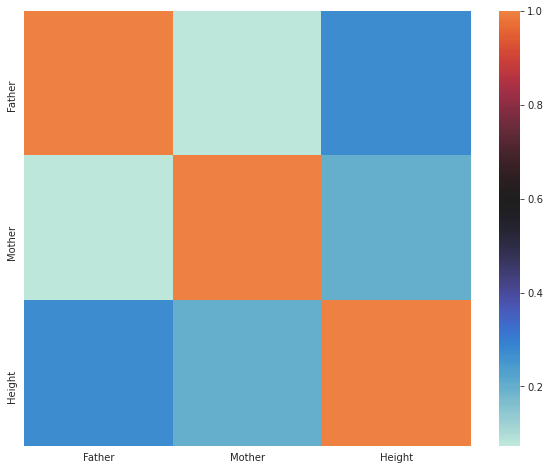

In [67]:
plt.subplots(figsize=(10, 8))
corr = df[['Father','Mother','Height']].corr()
sns.heatmap(corr, center=0.6,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Utilisez la methode pandas .corr() pour afficher la valeur des coefficients de correlation entre ces colonnes

In [68]:
df[['Father','Mother','Height']].corr()

Father    Mother    Height
Father  1.000000  0.073665  0.275355
Mother  0.073665  1.000000  0.201655
Height  0.275355  0.201655  1.000000

Quelles informations (relations entre features) pourriez vous tirer de cette representation ?

observation=[Feature1, Feature2, Feature3, Feature4, ...]

Verifier cela en traçant l'évolution de la taille des enfants en fonction de la mere, puis du pere

f(Taille_pere)=Taille_enfants=a x Taille_pere + b 


nb: Tracer la droite d'equation y=x sur cette representation de point pour evaluer le potentiel de cette regression :

In [72]:
df

Family  Father  Mother Gender   Height  Kids
0        1  199.39  170.18      M  185.928     4
1        1  199.39  170.18      F  175.768     4
2        1  199.39  170.18      F  175.260     4
3        1  199.39  170.18      F  175.260     4
4        2  191.77  168.91      M  186.690     4
..     ...     ...     ...    ...      ...   ...
893   136A  173.99  165.10      M  173.990     8
894   136A  173.99  165.10      M  171.958     8
895   136A  173.99  165.10      F  162.560     8
896   136A  173.99  165.10      F  161.290     8
897   136A  173.99  165.10      F  160.020     8

[898 rows x 6 columns]

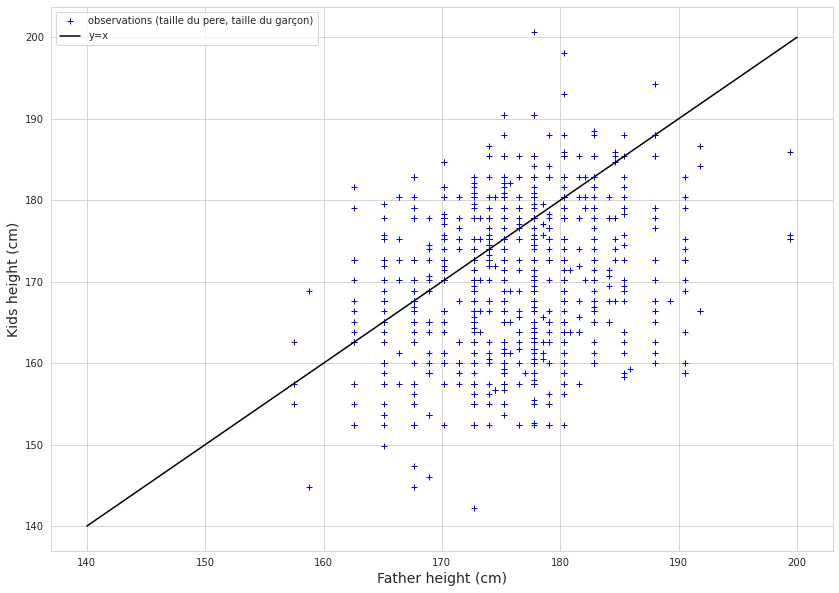

In [71]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Father'],df['Height'],'+',c='blue',label='observations (taille du pere, taille du garçon)')
plt.plot([140,200],[140,200],c='black',label='y=x')

plt.xlabel('Father height (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

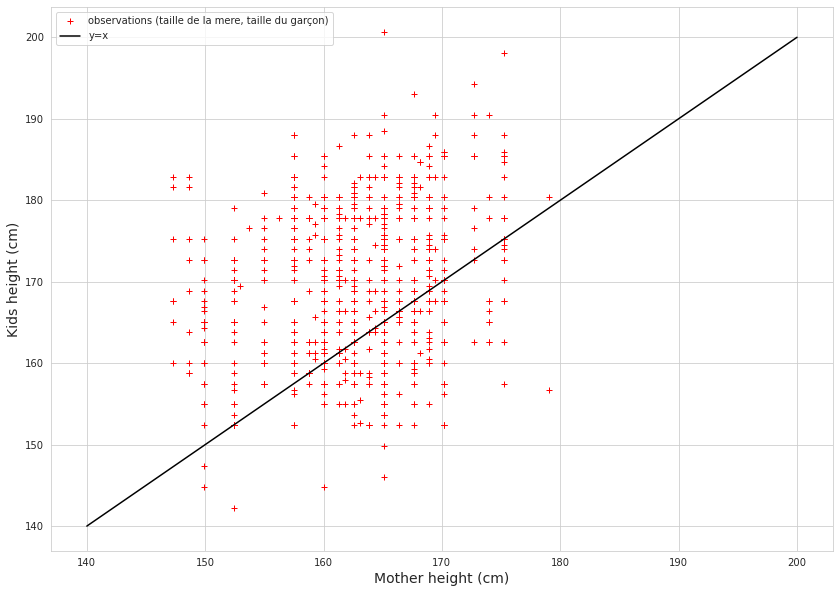

In [77]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Mother'],df['Height'],'+',c='red',label='observations (taille de la mere, taille du garçon)')
plt.plot([140,200],[140,200],c='black',label='y=x')


plt.xlabel('Mother height (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

Il y a, comment dire, un sacré "biais" entre l'évolution f(taille de la mere)=taille du garçon et la droite y=x

En ajoutant une droite d'equation y=x sur les precedents schéma, nous remarquons que nous pourrions construire une droite y=ax+b.

a : Le coefficient directeur deviendrait un coef de corrélation de la taille d'un des parents sur celle de leurs enfants

b: l'ordonnée à l'origine deviendrait un biais que nous modifierons pour recentrer les valeurs ainsi prédites


L'objectif étant de trouver les coefficients de notre fonction capables de minimiser les ecarts entre la prediction (la droite) et l'observation (les points)


Le modèle linéaire peut être estimé par la méthode des moindres carrés. Très populaire elle est très souvent présentée avec le modèle linéaire.

<img src="img/Estimateur_des_moindres_carres.png" width="800">

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

y - ŷ = y - (ax+b) = y - ax - b

<img src="img/reglin1.png" width="200">

Mais pour l'instant, restons sur un exercice intuitif de creation de model.

Ci dessous notre premier estimateur (y=ax+b) de la taille du garçon en fonction de la taille du pere

In [89]:
def pred_p(coef,b, hp):
    return (coef*hp)+b

# coeffs
coef=0.95
taille_pere=180
# Posons le biais à  0
biais=0
pred_p(coef,biais,taille_pere)

171.0

D'apres les donnees nous pouvons trouver une  moyenne d'une catégorie d'enfant dont le pere mesure 180 cm.

In [101]:
df.round().groupby(["Father"])['Height'].mean().round()

Father
157.0    158.0
159.0    157.0
163.0    165.0
165.0    165.0
166.0    171.0
168.0    165.0
169.0    164.0
170.0    170.0
171.0    167.0
173.0    167.0
174.0    171.0
175.0    170.0
176.0    169.0
177.0    170.0
178.0    170.0
179.0    170.0
180.0    172.0
181.0    168.0
182.0    174.0
183.0    173.0
184.0    172.0
185.0    174.0
186.0    159.0
188.0    174.0
189.0    168.0
190.0    171.0
192.0    176.0
199.0    178.0
Name: Height, dtype: float64

Ajustons le biais pour tendre vers cette valeur

In [104]:
# coeff de corelation 
coef=0.3
taille_pere=180
biais=118

pred_p(coef,biais,taille_pere)

172.0

Conservons les resultats de l'estimateur et representaons les resultats estimateurs et données reeles

In [108]:
x=df.groupby(["Father"])['Height'].mean().round().index
list(x)

[157.48,
 158.75,
 162.56,
 165.1,
 166.37,
 167.64000000000001,
 168.91,
 170.18,
 171.45,
 172.72,
 173.228,
 173.99,
 174.49800000000002,
 175.26,
 175.768,
 176.53,
 177.038,
 177.8,
 178.56199999999998,
 179.07,
 180.34,
 180.848,
 181.61,
 182.11800000000002,
 182.88,
 184.15,
 184.65800000000002,
 185.42000000000002,
 185.928,
 187.96,
 189.23,
 190.5,
 191.77,
 199.39000000000001]

In [109]:
est_p=[]
for xi in list(x):
    est_p.append(pred_p(coef,biais,xi)) 

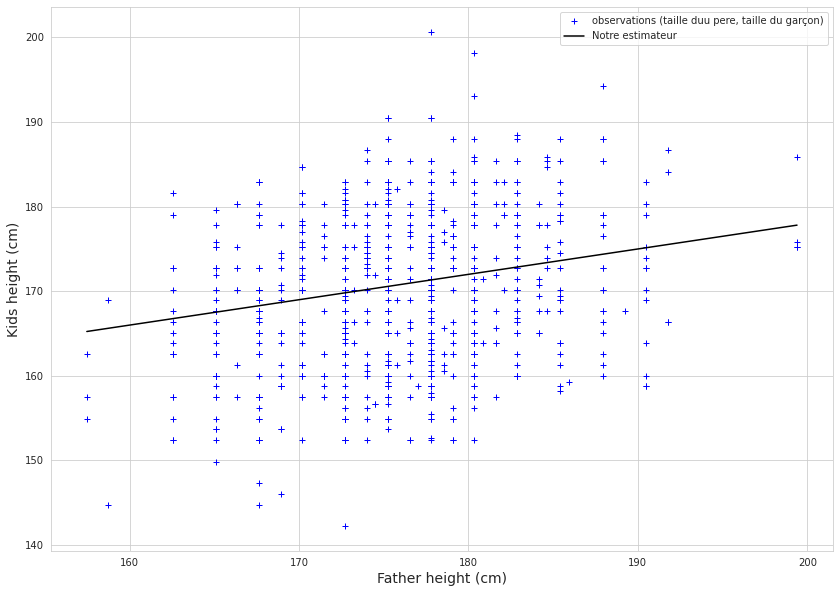

In [111]:
fig = plt.figure(figsize=(14,10))
plt.plot(df['Father'],df['Height'],'+',c='blue',label='observations (taille duu pere, taille du garçon)')

plt.plot(list(x),est_p,c='black',label='Notre estimateur')

plt.xlabel('Father height (cm)', fontsize=14)
plt.ylabel('Kids height (cm)', fontsize=14)
plt.legend()
plt.show()

Pour évaluer l'ecart entre notre estimateur et les données, nous allons construire un outil qui permet de le quantifier.

Le RMSE (Root Mean Squared Error) <=> La racine de la moyenne des erreurs au carré ...

In [113]:
Analyse=pd.DataFrame({"Taille_fils_données":df.groupby(["Father"])['Height'].mean().round(),"Taille_fils_pred":est_p})
Analyse

Taille_fils_données  Taille_fils_pred
Father                                        
157.480                158.0          165.2440
158.750                157.0          165.6250
162.560                165.0          166.7680
165.100                165.0          167.5300
166.370                171.0          167.9110
167.640                166.0          168.2920
168.910                164.0          168.6730
170.180                170.0          169.0540
171.450                167.0          169.4350
172.720                166.0          169.8160
173.228                171.0          169.9684
173.990                171.0          170.1970
174.498                166.0          170.3494
175.260                170.0          170.5780
175.768                169.0          170.7304
176.530                170.0          170.9590
177.038                159.0          171.1114
177.800                170.0          171.3400
178.562                169.0          171.5686
179.070                171.0          171.7210
180.340                172.0          172.1020
180.848                168.0          172.2544
181.610                172.0          172.4830
182.118                178.0          172.6354
182.880                173.0          172.8640
184.150                172.0          173.2450
184.658                178.0          173.3974
185.420                173.0          173.6260
185.928                159.0          173.7784
187.960                174.0          174.3880
189.230                168.0          174.7690
190.500                171.0          175.1500
191.770                176.0          175.5310
199.390                178.0          177.8170

In [125]:
(((Analyse['Taille_fils_pred']-Analyse['Taille_fils_données'])**2).sum()/len(Analyse))**(1/2)

4.624100296719099

#### Ameliorer notre predicteur en jouant sur le coefficient directeur et l'ordonnée à l'origine

Et calculer le nouveau RMSE, le but etant de le reduire


1) Definir un estimateur

2) Calculer une serie de prediction de l'estimateur

3) Calculer les ecarts de predictions avec les cibles (solutions: celle des donneés)

==> RMSE

In [178]:
### 1) 
def pred_p(coef,b, hp):
    return (coef*hp)+b

# coeffs
a=0.5
b=80



### 2) 
est_p=[]
for xi in list(x):
    est_p.append(pred_p(a,b,xi)) 
    
### 3) 
Analyse=pd.DataFrame({"Taille_fils_données":df.groupby(["Father"])['Height'].mean().round(),"Taille_fils_pred":est_p})

RMSE=(((Analyse['Taille_fils_pred']-Analyse['Taille_fils_données'])**2).sum()/len(Analyse))**(1/2)

print(RMSE)

4.034296587856795


#### Nous aurions pu trouver directement les meilleurs coefficients pour notre estimateur

Reprenons la methode des moindres carrés :

Effectuer une régression linéaire au sens des moindres carrés, c'est trouver la droite qui minimise l'écart
y-ŷ (cf schema), c'est-à-dire la somme des carrés des différences : on parle de droite des moindres carrés.

<img src="img/reglin1.png" width="300">

Il s'agit donc de minimiser J 


<img src="img/reglin3.png" width="300">

Pouvez vous me trouver les meilleurs coefficients a et b, en continuant cet exercice de minimisation ? 

<img src="img/reglin4.png" width="300">

Vous concluerez en calculant le RMSE sur ce nouvel estimateur.

In [182]:
Analyse['Taille_pere']=list(Analyse.index)
n=len(Analyse)
a_num=(Analyse['Taille_pere']*Analyse['Taille_fils_données']*n).sum()-(Analyse['Taille_pere'].sum()*Analyse['Taille_fils_données'].sum())
a_den=((Analyse['Taille_pere']*Analyse['Taille_pere']).sum()*n)-(Analyse['Taille_pere'].sum()*Analyse['Taille_pere'].sum())
a=a_num/a_den
print(a)

0.36567650830616844


In [177]:
b_sup1=(Analyse['Taille_fils_données'].sum()*(Analyse['Taille_pere']*Analyse['Taille_pere']).sum())
b_sup2=Analyse['Taille_pere'].sum()*(Analyse['Taille_pere']*Analyse['Taille_fils_données']).sum()
b_inf=a_den

b=(b_sup1-b_sup2)/b_inf
print(b)

104.17876952373263


In [194]:
# Correction Frederic

x=Analyse['Taille_pere']
y=Analyse['Taille_fils_données']
a = (n * (x*y).sum() - x.sum() * y.sum())/(n*(x**2).sum() - x.sum()**2)
b = ( y.sum()*(x**2).sum() - x.sum()*(x*y).sum())/(n*(x**2).sum() - x.sum()**2)
print(a,b)

0.3656765083062414 104.17876952373263


#### Refaite le meme exercice pour trouver un estimateur de la taille d'un garçon connaissant la taille de sa mère.

Vous concluerez en calculant le RMSE sur ce nouvel estimateur

### Avec la librairie sckit learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [219]:
X=Analyse[['Taille_pere']]
y=Analyse['Taille_fils_données']


In [220]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.coef_,reg.intercept_

(array([0.36567651]), 104.1787695237349)

In [221]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(reg.predict(X),y)

4.034296587856793

#### Sur l'integralité des données

In [222]:
X=df[["Father"]]
y=df['Height']

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.coef_,reg.intercept_)

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(reg.predict(X),y)

[0.39938127] 99.34038256617151


8.743934841592784

#### La généralisation de ces calculs dans un espace à plusieurs dimensions (plusieurs variables, ...) , nous pousse à utiliser des concepts abstraits mais plus universels



    1- Algèbre bilinéaire – Produit scalaire 
   

    2- Algèbre bilinéaire – Espaces euclidiens 
  

    3- Algèbre bilinéaire – Endomorphismes symétriques d’un espace euclidien, matrices symétrique 
   

    4- Projection orthogonale 


    5- Réduction des endomorphismes et des matrices symétriques 
   
    
